In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]#choose 2 of attributes for visualization
y = iris.target

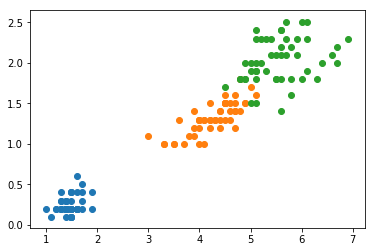

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_clf =  DecisionTreeClassifier(max_depth=2, criterion="entropy")
X = iris.data
y = iris.target
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

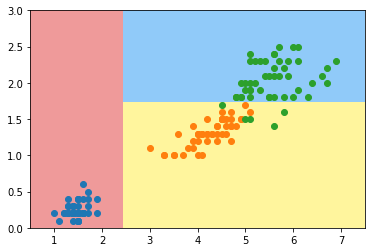

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model, axis):
    x0,x1 = np.meshgrid(np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
                       np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
                       )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)
    
plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for max_depth in [2,4,6]:
    for criterion in ['gini','entropy']:
        dt_clf =  DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
        dt_clf.fit(X_train,y_train)
        #test
        y_pred = dt_clf.predict(X_test)
        print("max_depth@{}, criterion@1{}, Accuracy@Test:{}".format(max_depth, criterion, accuracy_score(y_test, y_pred)))
        #train
        y_train_pred = dt_clf.predict(X_train)
        print("max_depth@{}, criterion@1{}, Accuracy@Training:{}".format(max_depth, criterion, accuracy_score(y_train, y_train_pred)))

max_depth@2, criterion@1gini, Accuracy@Test:0.9666666666666667
max_depth@2, criterion@1gini, Accuracy@Training:0.9583333333333334
max_depth@2, criterion@1entropy, Accuracy@Test:0.9666666666666667
max_depth@2, criterion@1entropy, Accuracy@Training:0.9583333333333334
max_depth@4, criterion@1gini, Accuracy@Test:0.9666666666666667
max_depth@4, criterion@1gini, Accuracy@Training:0.9916666666666667
max_depth@4, criterion@1entropy, Accuracy@Test:0.9666666666666667
max_depth@4, criterion@1entropy, Accuracy@Training:0.9916666666666667
max_depth@6, criterion@1gini, Accuracy@Test:0.9666666666666667
max_depth@6, criterion@1gini, Accuracy@Training:1.0
max_depth@6, criterion@1entropy, Accuracy@Test:0.9666666666666667
max_depth@6, criterion@1entropy, Accuracy@Training:1.0


I checked two parameters: max_depth and criterion. The results show that the model complexity is mainly controlled by max_depth. By promoting max_depth'value, the model is more complex and the overfitting is more obvious, the tradeoff of bias and variance can be observed.

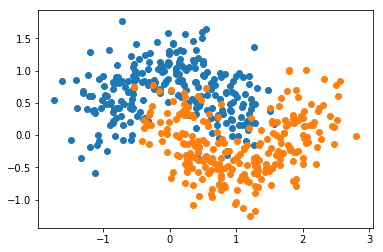

In [12]:
X,y =datasets.make_moons(n_samples=500, noise =0.3, random_state=42)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [15]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300,max_samples=300,bootstrap=True,oob_score=True)
bagging_clf.fit(X,y)
print(bagging_clf.oob_score_)

0.908


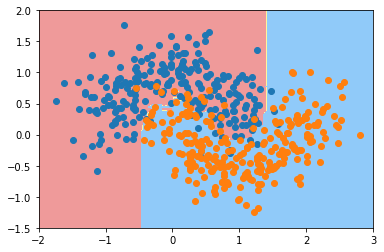

In [11]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model, axis):
    x0,x1 = np.meshgrid(np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
                       np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
                       )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)
plot_decision_boundary(bagging_clf,axis=[-2,3,-1.5,2])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

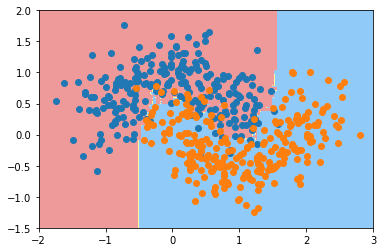

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=300, random_state=666,oob_score=True)
rf_clf.fit(X,y)
plot_decision_boundary(rf_clf,axis=[-2,3,-1.5,2])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for n_estimators in [1,2,4]:
        bagging_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300,max_samples=300,bootstrap=True,oob_score=True)
        bagging_clf.fit(X_train,y_train)
        #train
        y_train_pred = bagging_clf.predict(X_train)
        print("n_estimators@{}, Accuracy@Training:{}".format(n_estimators, accuracy_score(y_train, y_train_pred)))
        #test
        y_pred = bagging_clf.predict(X_test)
        print("n_estimators@{}, Accuracy@Test:{}".format(n_estimators, accuracy_score(y_test, y_pred)))
        # Bias^2 + Variance + Noise decomposition of the mean squared error
        y_bias = np.mean((y_test - y_pred) ** 2)
        y_var = np.var(y_test - y_pred)

        print("Bias@{},Var@{}".format(y_bias,y_var))

n_estimators@1, Accuracy@Training:0.9975
n_estimators@1, Accuracy@Test:0.91
Bias@0.09,Var@0.0891
n_estimators@2, Accuracy@Training:0.9975
n_estimators@2, Accuracy@Test:0.91
Bias@0.09,Var@0.0891
n_estimators@4, Accuracy@Training:1.0
n_estimators@4, Accuracy@Test:0.9
Bias@0.1,Var@0.0984


Automatically created module for IPython interactive environment
Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


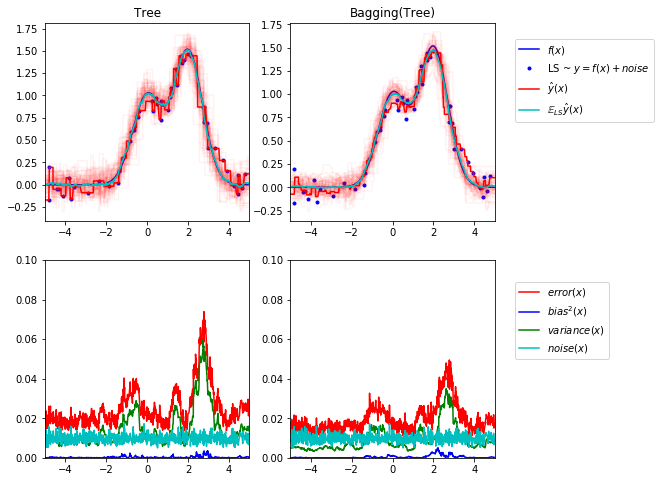

In [21]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html
print(__doc__)

# Author: Gilles Louppe <g.louppe@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#model prepare
estimators = [("Tree", DecisionTreeClassifier()),
              ("Bagging(Tree)", BaggingClassifier(DecisionTreeClassifier()))]

n_estimators = len(estimators)
#dataset prepare
X,y =datasets.make_moons(n_samples=500, noise =0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions

    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = (y_test - y_predict) ** 2 
    y_noise = np.var(y_test)
    y_bias = ((y_test-y_noise) - y_predict) ** 2
    y_var = np.var(y_predict)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

Tree: 0.1400 (error) = 0.2303 (bias^2)  + 0.2500 (var) + 0.2464 (noise)
Bagging(Tree): 0.1400 (error) = 0.2204 (bias^2)  + 0.2496 (var) + 0.2464 (noise)
